## STEG 1: DATAINSAMLING 

**Uppgift**: Ladda in data och beskriv den

In [57]:
import pandas as pd

df = pd.read_csv("../data/Test.csv")


In [58]:
# Konvertera temperatur från Kelvin till Celsius
df["temperature"] = df["temperature"] - 273.15


In [59]:
# Visa första 5 raderna
df.head()



,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,NaN,73,63,1,27,4,4,12.00,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,NaN,251,63,1,27,4,4,12.00,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,NaN,75,56,1,0,1,1,12.00,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,NaN,98,56,1,351,2,2,11.64,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,NaN,283,56,1,351,1,1,11.64,0.0,0,90,Mist,mist


In [35]:
# Visa antal rader och kolumner
df.shape

(14454, 14)

In [36]:
# Lista alla kolumner
list(df.columns)

['date_time',
 'is_holiday',
 'air_pollution_index',
 'humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'rain_p_h',
 'snow_p_h',
 'clouds_all',
 'weather_type',
 'weather_description']

**Förklaring**: [Beskriv kort vilken data ni har och vad kolumnerna betyder] 

---

Datan består av väderinformation och luftföroreningsnivåer, och varje rad representerar en timmes mätning. och kolumnen ser man på övre delan och vad det är.

## STEG 2: DATARENSNING 

**Uppgift**: Verifiera att data är OK

In [ ]:
# kolla saknade värden
print("Saknade värden per kolumn")
display(df.isna().sum())  



Saknade värden per kolumn


date_time                  0
is_holiday             14436
air_pollution_index        0
humidity                   0
wind_speed                 0
wind_direction             0
visibility_in_miles        0
dew_point                  0
temperature                0
rain_p_h                   0
snow_p_h                   0
clouds_all                 0
weather_type               0
weather_description        0
dtype: int64

In [ ]:
# kolla dubbletter
print("Antal dubbletter (hela rader som är kopior):", 
df.duplicated().sum())
dups = df[df.duplicated()]


Antal dubbletter (hela rader som är kopior): 0


In [ ]:
# Visa statistik för numeriska kolumner
df.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all
count,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.000000,14454.0,14454.000000
mean,154.679397,67.833887,3.607306,209.285319,5.005535,5.005535,10.709084,0.066965,0.0,46.801785
std,83.405392,21.147425,2.212177,94.996443,2.586276,2.586276,12.769255,0.466853,0.0,39.232165
min,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,-27.000000,0.000000,0.0,0.000000
25%,83.000000,54.000000,2.000000,140.000000,3.000000,3.000000,0.570000,0.000000,0.0,1.000000
50%,155.000000,71.000000,3.000000,211.000000,5.000000,5.000000,14.575000,0.000000,0.0,40.000000
75%,227.000000,85.000000,5.000000,290.000000,7.000000,7.000000,20.710000,0.000000,0.0,90.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,36.920000,10.600000,0.0,92.000000


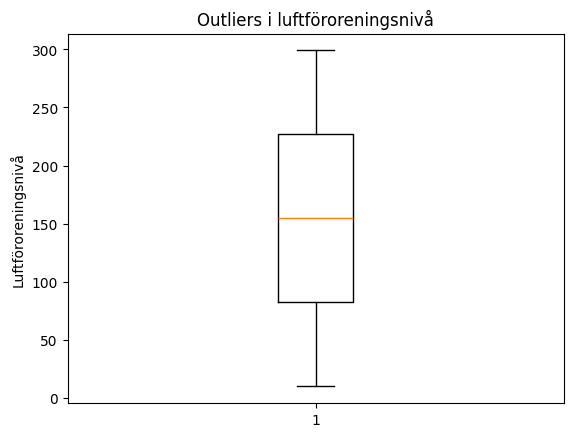

In [47]:
# Kolla efter outliers (extremvärden)
import matplotlib.pyplot as plt

plt.boxplot(df["air_pollution_index"])
plt.title("Outliers i luftföroreningsnivå")
plt.ylabel("Luftföroreningsnivå")
plt.show()


**Slutsats**: [Är datan OK? Finns det problem?]

---

datan är bra skick men det finns endas saknade värden och det är kolmnunen is_holiday, och vi tog bort den för den har inga värde men dom övriga kolumnen är kompletta.

## STEG 3: DATAANALYS 

**Uppgift**: Välj 2 analyser med grafer

### ANALYS 1: [Välj en analys från instruktionerna]

**Fråga**: [Vad vill ni ta reda på?]

1. analys: Finns det samband mellan temperaturen och luftföroreningensnivån(air_pollution_index)?

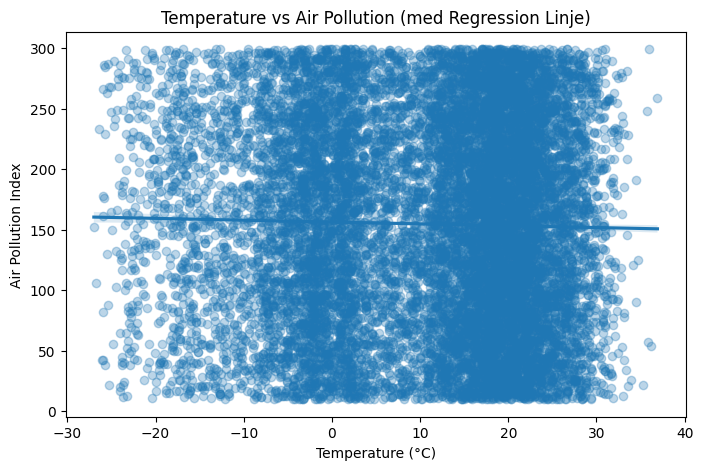

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot med regressionslinje
plt.figure(figsize=(8,5))
sns.regplot(
    x="temperature", 
    y="air_pollution_index", 
    data=df, 
    scatter_kws={"alpha":0.3}
)
# Lägg till etiketter och titel
plt.xlabel("Temperature (°C)")
plt.ylabel("Air Pollution Index")
plt.title("Temperature vs Air Pollution (med Regression Linje)")
plt.show()


**Resultat**: [Vad ser ni i grafen? 2-3 meningar]

---

I graffen ser vi inget samband mellan temperaturen och luftföroreningar, i olika temperatursnivå så förekommer både höga och löga luftföroreningar, som gör att temperaturen har inga starkt påverkan av luftföroreningsnivåerna.

### ANALYS 2: [Välj en till analys]

**Fråga**: [Vad vill ni ta reda på?]

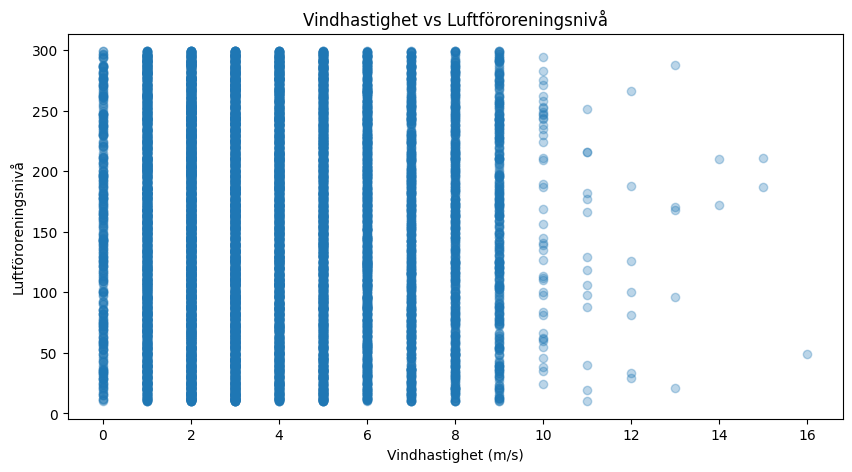

In [ ]:
# ANALYS 1: Finns det ett samband mellan temperatur och luftföroreningar?
import matplotlib.pyplot as plt

# skapa en figur med storlek 10x5
plt.figure(figsize=(10,5))

# rita en scatter plot med wind_speed på x-axeln och air_pollution_index på y-axeln
plt.scatter(df["wind_speed"], df["air_pollution_index"], alpha=0.3)

# namn på x-axeln, y-axeln och titel på grafen
plt.xlabel("Vindhastighet (m/s)")
plt.ylabel("Luftföroreningsnivå")
plt.title("Vindhastighet vs Luftföroreningsnivå")
plt.show()


**Resultat**: [Vad ser ni? 2-3 meningar]

---

Grafen visar att luftföroreningarna tenderar vara högre vid låg vindhastighet och lägre vid hög vindhastighet. Det finns ingen skrap linjär trend, men det syns en tdensn att högre vind sprider ut föreningar, vilket leder till lägre värden.

## STEG 4: PREDIKTIV MODELL 

**Uppgift**: Bygg en modell som förutsäger energiförbrukning

### 4.1 Välj Features

**Förklaring**: [Vilka features valde ni och VARFÖR?]

Vi valde temperatur, luftfuktighet och vindhastighet som features eftersom dessa väderfaktorer kan påverka hur luftföroreningar sprods i luften. Temperatur påverkar hur partiklar rör sig, luftfuktighet kan binda partiklar och minska spridningen, och vindhastighet är en av de viktigaste faktoererna eftersom stark vind kan blåsa bort föroreningarna. Därför är dessa features rimliga att använda för att försöka förutsäga luftföroreningsnivån.

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Definiera features (X) och target (Y)
X = df[["temperature", "humidity", "wind_speed"]]
Y = df["air_pollution_index"]

# Dela upp data i tränings- och testset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


### 4.2 Bygg och träna modellen

In [52]:
# Skapa en linjär regressionsmodell
model = LinearRegression()

# Träna modellen på träningsdata
model.fit(X_train, Y_train)

# prediktera på datatestet
Y_pred = model.predict(X_test)


### 4.3 Utvärdera modellen

R² score: -0.00042807108936315785
Mean Absolute Error: 71.91470454641161


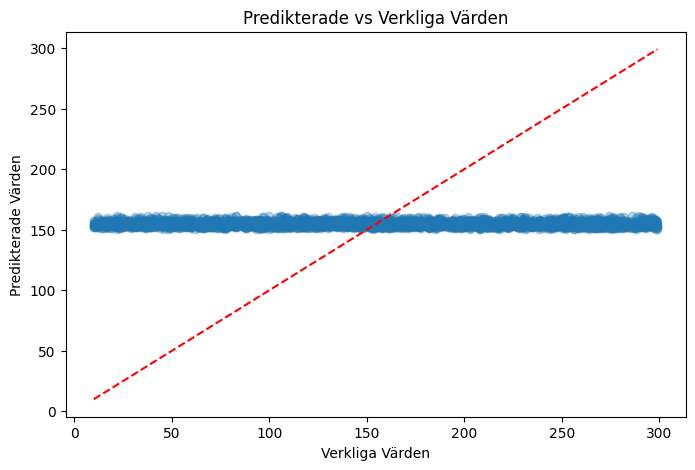

In [53]:
# Beräkna R² score
r2 = r2_score(Y_test, Y_pred)
print("R² score:", r2)


# Beräkna Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Skapa en scatter plot för att jämföra verkliga värden med predikterade värden
plt.figure(figsize=(8,5))
plt.scatter(Y_test, Y_pred, alpha=0.3)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Verkliga Värden")
plt.ylabel("Predikterade Värden")
plt.title("Predikterade vs Verkliga Värden")
plt.show()

**Resultat**: 
- R² score: -0.00042807108936315785
- MEAN Absolute Error: 71.91470454641161

**Diskussion**: [Är modellen bra eller dålig? Varför? 3-5 meningar]

Det är väldigt dålig modell ju met att R2 ligger mindre än 0.0
när R2 är mindre än 0 innebär det att modellen presterar sämre än en horisontell linje som predikterar medelvärdet av målvariabeln hela tiden.


## STEG 5: REKOMMENDATIONER - VG uppgift

Baserat på era analyser, ge  **1 konkret rekommendation**.

### REKOMMENDATION 1: Övervaka luftföroreningar (air_pollution_index) vid låga vindnivåer

**Varför**:

Baserat på analysen mellan vindhastigheten (wind_speed) och luftföroreningsnivåerna (air_pollution_index) såg vi att luftföroreningarna ofta är högre när vindhastigheten är låg. Vid svag vind kan föroreningar samlas i luften nära marknivå eftersom de inte blåser bort. Därför är luftkvaliteten sämre under perioder med lite vind.

**Åtgärd**:

Familjen bör vara extra uppmärksamma på luftkvaliteten under dager som svag vind, och det kan göras på olika sätt, men ett sätt är att kontrollera luftkvaliteten i realtid tex via en app eller sensor som mäter luftföroreningar.

**Effekt**:

Genom att unvika tt vistas eller vädra under perioder med låg vind så minskar risken att släppas in i förorenad/smutsigt luft i hemmet. det leder till bättre inomhusluft och hälsosammare miljö, för barn, äldre och personer med allergier eller astma.




### REKOMMENDATION 2: Övervaka luftkvaliteten vid höga molnhalter och specifika vädertyper

**Varför**:

Analysen visar att temperatur och luftföroreningar inte har ett starkt linjärt samband, vilket tyder på att andra väderaktorer (molnhalter, vädertyp, vind) är mer relevanta. Data visar att luftföroreningsindex varierar mellan 0-300, medan de flesta mätningar ligger runt 150-170, vilket indikerar att vissa väderförhållanden kan påverka luftkvaliteten betydligt.

**Åtgärd**:

Familjen bör installera en luftkvalitetsövervakning (IoT-sensor) som mäter luftföroreningsindex kontinuerligt och sätta upp varningar när indexet överstiger 200. De bör också notera tidpunkterna när molnhalter är höga (clouds_all > 70%) och vädertypen är "Fog" eller "Smoke" - detta är tider när luftkvaliteten troligen är sämre.

**Effekt**:

Genom att övervaka luftkvaliteten vid kritiska väderförhållanden kan familjen:

-Stänga fönster när luftföroreningarna är höga.
-Justera luftventilationen för att förbättra inomhusluftkvaliteten.
-Minska exponering för skadliga partiklar, vilket är bättre för hälsan.
-Planera utomhusaktiviteter på dagar med bättre luftkvalitet

---



## Slutsats

I Projektet analyserade vi hur olika väderfaktorer påverkar luftföroreningsnivåan. Våra analyser visade att vindhastigheten och  molnhalter har störst påverkan, där låga vindnivåer ofta leder till högre luftföroreningar eftersom föroreningarna inte sprids. Däremot hittade vi inget tydligt samband mellan temperatur och luftföroreningar. Den prediktiva modellen presterade dåligt, vilket syns genom att ett negativt R² värde och ett högt MAE. Det betyder att modellen inte kunde förklara variationen i luftföroreningsnivåerna utfirån vädret. Detta tyder på att luftföroreningarna påverkas  mer av andra faktorer, till exampel trafik och industri, som inte finns med i datasetet.

Baserat på analysen rekomenderar vi att man övervakar luftkvaliteten extra noga under dagar med låg vind, eftersom luftföroreningsnivåerna då är högre och kan påverka hälsan negativt.